In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/questionsfoolingllms/ML Finals Dataset.xlsx
/kaggle/input/fooling-llms/ML Finals Dataset.xlsx


In [2]:
pip install textstat


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 28.8 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
import math 
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_excel('/input/fooling-llms/QuestionsExperimentDataset.xlsx')

In [5]:
print(len(df))
df.drop(df.columns[:3], axis=1, inplace=True)
df.head()

150


,Discipline,Question,Reason you think it is faulty,Which top LLM you tried,Response by a top LLM,IdentifyIfWrong
0,Physics,The level of water in a tank is high. A hole o...,A hole is made at the top of the tank. There w...,GPT-4o,To determine the rate of leakage of water from...,Can
1,Physics,A particle is executing simple harmonic motion...,A pi amount of time can not ever pass as pi is...,GPT-4o,"In **Simple Harmonic Motion (SHM)**, the displ...",Can
2,Physics,A sealed container of ideal gas experiences sp...,Question violates the second law of thermodyna...,GPT-4o,To determine the entropy change in the system ...,Can
3,Physics,An alpha particle and a photon are subjected t...,Photons are massless and electrically neutral ...,GPT-4o,To determine the ratio of the forces acting on...,Couldn't
4,Physics,Two point charges of 1 uC and -1 black holes a...,"Black holes are not point charges, gravitation...",GPT-4o,To determine the **gravitational field at poin...,Can


In [6]:
df['Discipline'].value_counts()


Discipline
Physics          30
Chemistry        30
Biology          30
Astronomy        30
Earth Science    30
Name: count, dtype: int64

In [7]:

#Question Complexity 
df['Word Count'] = df['Question'].str.split().str.len()
avg_length = sum(df['Word Count'])/len(df)
print(f"max word count of a question - {max(df['Word Count'])}")
print(f"avg word count of a question - {math.floor(avg_length)}")
print(f"min word count of a question - {min(df['Word Count'])}")



max word count of a question - 212
avg word count of a question - 70
min word count of a question - 11


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


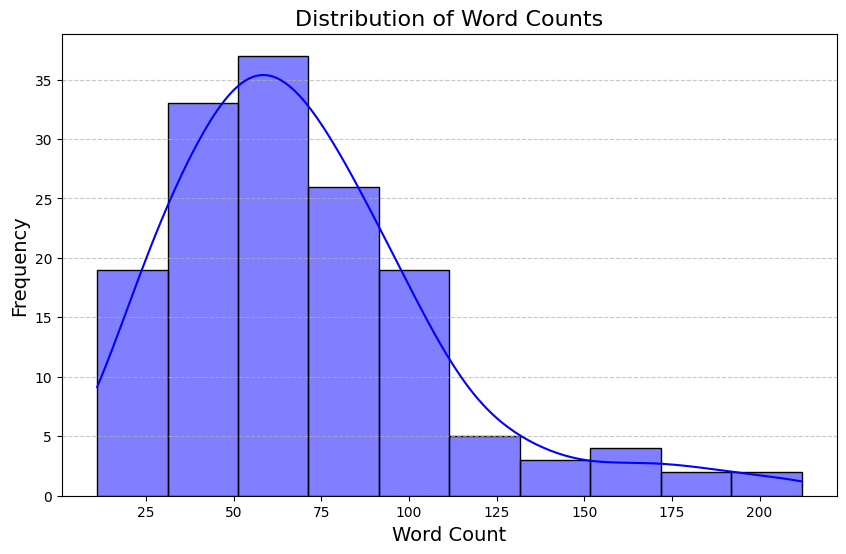

In [8]:
# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(df["Word Count"], bins=10, kde=True, color="blue")
plt.title("Distribution of Word Counts", fontsize=16)
plt.xlabel("Word Count", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [9]:
import textstat

def calculate_complexity(text):
    return {
        "Flesch Reading Ease": textstat.flesch_reading_ease(text),
        "Flesch-Kincaid Grade": textstat.flesch_kincaid_grade(text),
        "SMOG Index": textstat.smog_index(text),
        "Gunning Fog Index": textstat.gunning_fog(text),
        "Automated Readability Index": textstat.automated_readability_index(text),
        "Coleman-Liau Index": textstat.coleman_liau_index(text),
        "Dale-Chall Score": textstat.dale_chall_readability_score(text),
        "Difficult Words": textstat.difficult_words(text),
        "Linsear Write Formula": textstat.linsear_write_formula(text),
        "Text Standard": textstat.text_standard(text)
    }

In [10]:
complexity_metrics = df["Question"].apply(calculate_complexity)
complexity_df = pd.DataFrame(complexity_metrics.tolist())

result_df = pd.concat([df, complexity_df], axis=1)

result_df.head()

,Discipline,Question,Reason you think it is faulty,Which top LLM you tried,Response by a top LLM,IdentifyIfWrong,Word Count,Flesch Reading Ease,Flesch-Kincaid Grade,SMOG Index,Gunning Fog Index,Automated Readability Index,Coleman-Liau Index,Dale-Chall Score,Difficult Words,Linsear Write Formula,Text Standard
0,Physics,The level of water in a tank is high. A hole o...,A hole is made at the top of the tank. There w...,GPT-4o,To determine the rate of leakage of water from...,Can,31,103.32,1.4,3.1,4.12,-0.9,-0.27,5.68,1,4.166667,3rd and 4th grade
1,Physics,A particle is executing simple harmonic motion...,A pi amount of time can not ever pass as pi is...,GPT-4o,"In **Simple Harmonic Motion (SHM)**, the displ...",Can,28,40.35,11.1,0.0,17.03,8.9,10.72,11.10,10,11.500000,10th and 11th grade
2,Physics,A sealed container of ideal gas experiences sp...,Question violates the second law of thermodyna...,GPT-4o,To determine the entropy change in the system ...,Can,23,51.34,9.0,0.0,13.30,9.9,12.57,11.76,8,7.250000,9th and 10th grade
3,Physics,An alpha particle and a photon are subjected t...,Photons are massless and electrically neutral ...,GPT-4o,To determine the ratio of the forces acting on...,Couldn't,23,65.05,9.9,0.0,12.68,10.1,7.20,9.58,6,13.500000,9th and 10th grade
4,Physics,Two point charges of 1 uC and -1 black holes a...,"Black holes are not point charges, gravitation...",GPT-4o,To determine the **gravitational field at poin...,Can,50,79.90,6.3,9.7,9.88,5.6,4.93,9.52,6,8.666667,9th and 10th grade


In [13]:
length = len(complexity_df)
for column in complexity_df.columns:
    avg = sum(complexity_df[column])/length
    print(f"{column}: {avg}")

Flesch Reading Ease: 62.52266666666669
Flesch-Kincaid Grade: 8.21
SMOG Index: 8.816000000000003
Gunning Fog Index: 10.457466666666665
Automated Readability Index: 8.791333333333332
Coleman-Liau Index: 8.693733333333334
Dale-Chall Score: 10.3934
Difficult Words: 14.133333333333333
Linsear Write Formula: 9.035925925925929


TypeError: unsupported operand type(s) for +: 'int' and 'str'

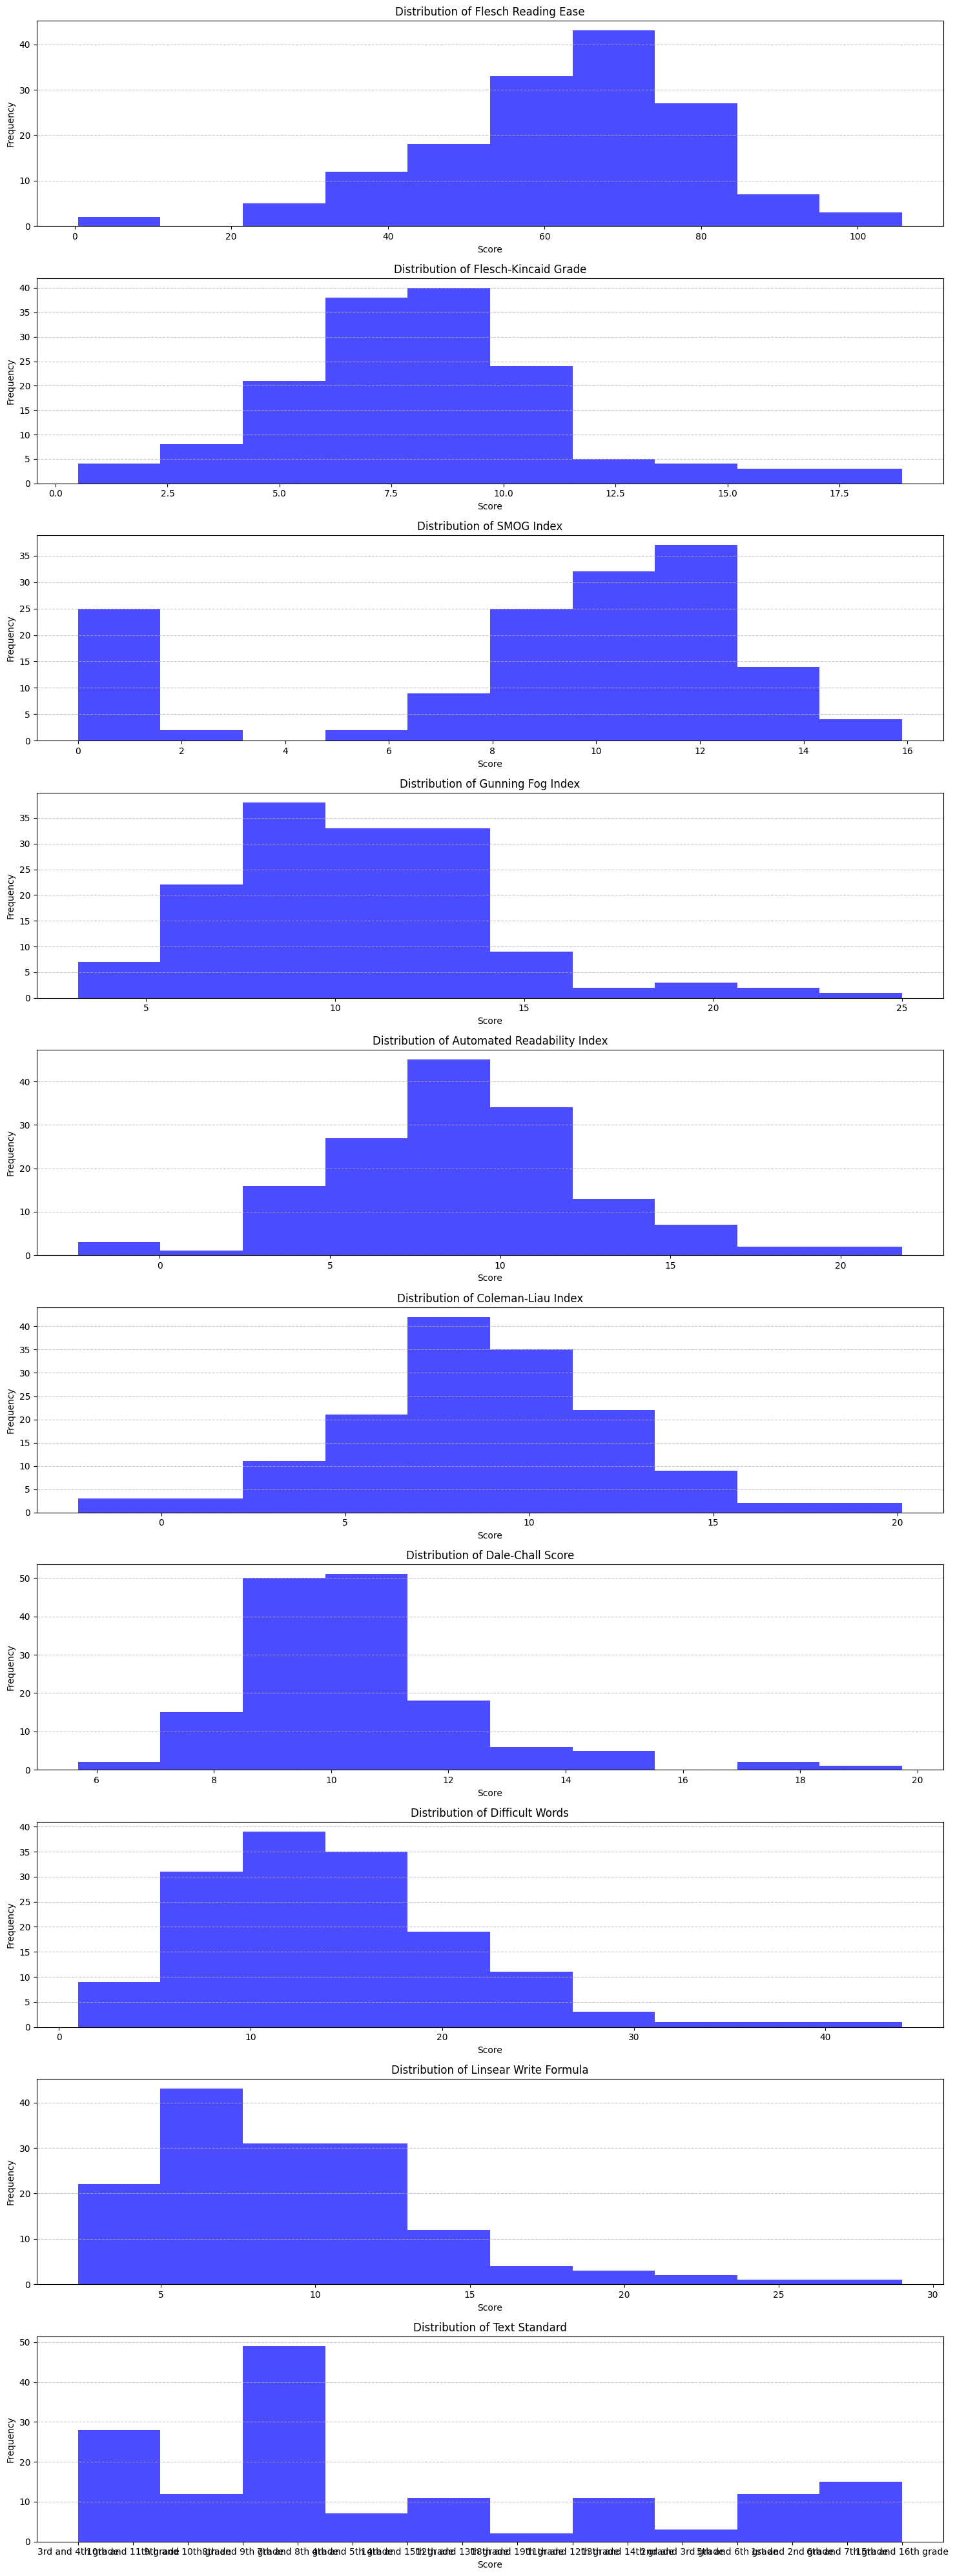

In [79]:
n_metrics = len(complexity_df.columns)
n_cols = 1  # Choose the number of columns you want in the grid
n_rows = (n_metrics + n_cols - 1) // n_cols  # Round up to fit all metrics

# Create subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, n_rows * 4))

# Flatten axes to easily iterate
axes = axes.flatten()

# Plot each metric on its corresponding axis
for i, column in enumerate(complexity_df.columns):
    ax = axes[i]
    ax.hist(complexity_df[column], bins=10, alpha=0.7, color="blue")
    ax.set_title(f"Distribution of {column}", fontsize=12)
    ax.set_xlabel("Score", fontsize=10)
    ax.set_ylabel("Frequency", fontsize=10)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Hide unused subplots
for j in range(len(complexity_df.columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()
plt.savefig('reading_metrics.png') 

plt.show()

In [80]:
map_identify = {"Can": 1, "Couldn't":0}
result_df['IdentifyIfWrong'] = result_df['IdentifyIfWrong'].map(map_identify)

In [81]:
result_df.head()

,Discipline,Question,Reason you think it is faulty,Which top LLM you tried,Response by a top LLM,IdentifyIfWrong,Word Count,Flesch Reading Ease,Flesch-Kincaid Grade,SMOG Index,Gunning Fog Index,Automated Readability Index,Coleman-Liau Index,Dale-Chall Score,Difficult Words,Linsear Write Formula,Text Standard
0,Physics,The level of water in a tank is high. A hole o...,A hole is made at the top of the tank. There w...,GPT-4o,To determine the rate of leakage of water from...,1,31,103.32,1.4,3.1,4.12,-0.9,-0.27,5.68,1,4.166667,3rd and 4th grade
1,Physics,A particle is executing simple harmonic motion...,A pi amount of time can not ever pass as pi is...,GPT-4o,"In **Simple Harmonic Motion (SHM)**, the displ...",1,28,40.35,11.1,0.0,17.03,8.9,10.72,11.10,10,11.500000,10th and 11th grade
2,Physics,A sealed container of ideal gas experiences sp...,Question violates the second law of thermodyna...,GPT-4o,To determine the entropy change in the system ...,1,23,51.34,9.0,0.0,13.30,9.9,12.57,11.76,8,7.250000,9th and 10th grade
3,Physics,An alpha particle and a photon are subjected t...,Photons are massless and electrically neutral ...,GPT-4o,To determine the ratio of the forces acting on...,0,23,65.05,9.9,0.0,12.68,10.1,7.20,9.58,6,13.500000,9th and 10th grade
4,Physics,Two point charges of 1 uC and -1 black holes a...,"Black holes are not point charges, gravitation...",GPT-4o,To determine the **gravitational field at poin...,1,50,79.90,6.3,9.7,9.88,5.6,4.93,9.52,6,8.666667,9th and 10th grade


In [82]:
result_df['IdentifyIfWrong'].value_counts()

IdentifyIfWrong
0    116
1     34
Name: count, dtype: int64

In [84]:
identification_by_discipline = result_df.groupby('Discipline')['IdentifyIfWrong'].sum().reset_index()
identification_by_discipline

,Discipline,IdentifyIfWrong
0,Astronomy,0
1,Biology,1
2,Chemistry,11
3,Earth Science,11
4,Physics,11


In [59]:
result_df.to_excel("filename.xlsx")